## Classifying Yelp Reviews

**Yelp reviews were classified into 1 or 5 star categories based off the text and other features of the dataset. Parameters of estimators were optimized in the Pipeline by cross-validated grid-search. Logistic Regression was used as estimator.** 

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from textblob import TextBlob, Word
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Import data**


In [3]:
yelp_data = pd.read_csv(r'C:/Users/hamed/Desktop/yelp.csv')
yelp_data.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [4]:
yelp_data.head(4)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0


In [5]:
yelp_data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp_data.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

**Create new columns called "length" and "sentiment"**

In [7]:
yelp_data['length'] = yelp_data.text.apply(len)
def detect_sentiment(text):
    #return TextBlob(text.decode('utf-8')).sentiment.polarity
    return TextBlob(text).sentiment.polarity
yelp_data['sentiment'] = yelp_data.text.apply(detect_sentiment)

In [8]:
yelp_data.groupby('stars').mean()

,cool,useful,funny,length,sentiment
stars,,,,,
1,0.576769,1.604806,1.056075,826.515354,-0.017906
2,0.719525,1.563107,0.875944,842.256742,0.096832
3,0.788501,1.306639,0.694730,758.498289,0.193733
4,0.954623,1.395916,0.670448,712.923142,0.277061
5,0.944261,1.381780,0.608631,624.999101,0.333293


**Selecting reviews with 1 and 5 stars**

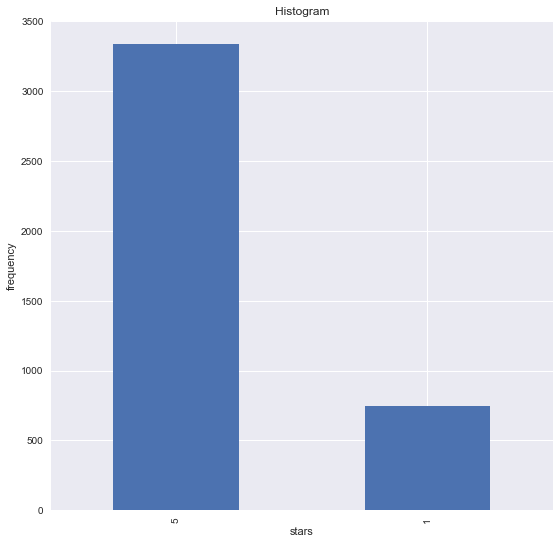

In [9]:
df_yelp=yelp_data[(yelp_data.stars==1) | (yelp_data.stars==5)]
star_counts=df_yelp['stars'].value_counts()
star_counts.plot(kind = 'bar', figsize = (9, 9))
plt.xlabel('stars')
plt.ylabel('frequency')
plt.title('Histogram')

**Comparision of text length and sentiment for 1 star and 5 star reviews** 

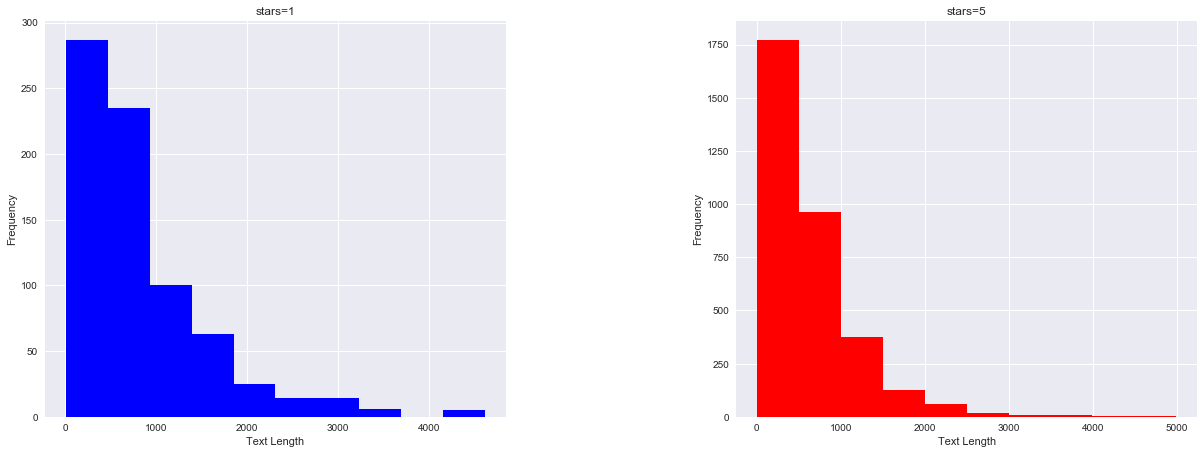

In [10]:
fig, ax = plt.subplots (1,2)
ax[0].hist(df_yelp['length'][df_yelp['stars']==1], facecolor='b', label='Distribution of text length' )
ax[1].hist(df_yelp['length'][df_yelp['stars']==5], facecolor='r', label='Distribution of text length' )
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')
ax[0].set_title('stars=1')
ax[1].set_xlabel('Text Length')
ax[1].set_ylabel('Frequency')
ax[1].set_title('stars=5')
fig.subplots_adjust(left=0, right=2, bottom=0, top=1, hspace=0.05, wspace=0.5)

**Boxplot of text length and sentiment for 1 and 5 stars reviews**

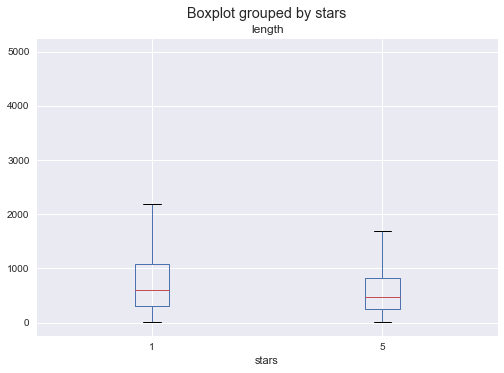

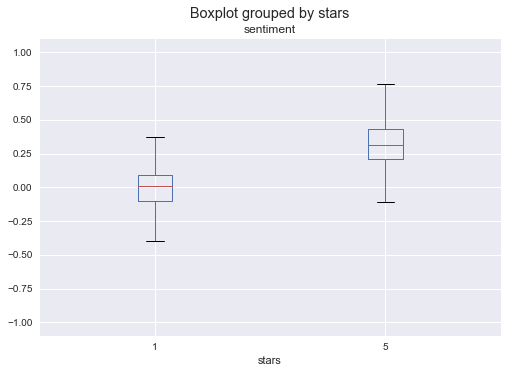

In [11]:
df_yelp.boxplot(column='length', by='stars')
df_yelp.boxplot(column='sentiment', by='stars')

**Getting correlation values between the review stars and sentiment and other features** 

In [12]:
df_yelp.corr()

,stars,cool,useful,funny,length,sentiment
stars,1.000000,0.060861,-0.033213,-0.088261,-0.129617,0.564408
cool,0.060861,1.000000,0.899352,0.689206,0.223074,-0.031848
useful,-0.033213,0.899352,1.000000,0.675535,0.287143,-0.085044
funny,-0.088261,0.689206,0.675535,1.000000,0.263126,-0.126340
length,-0.129617,0.223074,0.287143,0.263126,1.000000,-0.236073
sentiment,0.564408,-0.031848,-0.085044,-0.126340,-0.236073,1.000000


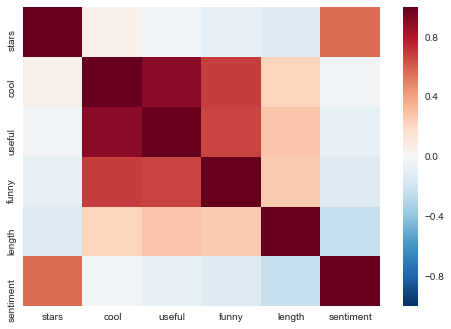

In [13]:
sns.heatmap(df_yelp.corr())

In [14]:
df_yelp['stars']=df_yelp.stars.map({1:0, 5:1})

C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Calculating Null acuuracy**

In [15]:
features = ['text', 'cool', 'useful', 'funny', 'length', 'sentiment']
X= df_yelp[features]
y = df_yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
print('Null acuuracy is:', y_test.mean())
print(1 - y_test.mean())

Null acuuracy is: 0.8199608610567515
0.18003913894324852


**Optimizing model using Gridsearch and pipeline**

In [19]:
X= df_yelp['text']
y = df_yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression(C=1e9)),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
print("pipeline:", [name for name in pipeline.steps])
print("parameters:", parameters)
grid_search.fit(X_train, y_train)
print("Best score:", grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
   print(param_name ,':', best_parameters[param_name])


pipeline: [('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('logreg', LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]
parameters: {'vect__max_df': (0.5, 0.75, 1.0), 'vect__max_features': (None, 5000, 10000, 50000), 'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2')}
Fitting 3 folds for each of

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  3.3min finished


Best score: 0.943211488251
Best parameters set:
tfidf__norm : l2
tfidf__use_idf : True
vect__max_df : 1.0
vect__max_features : None
vect__ngram_range : (1, 1)


**Model and prediction using uptimized parameters and after applying lematizer and other features**

In [50]:
def lemmas(text):
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [51]:
#Logistic Regression_TFIDF
features = ['text', 'cool', 'useful', 'funny', 'length', 'sentiment']
X= df_yelp[features]
y = df_yelp['stars']
vect = TfidfVectorizer(
    analyzer=lemmas, 
    stop_words='english', 
    norm='l2', 
    use_idf=True, 
    max_df=1.0, 
    max_features=None,
    ngram_range= (1,1)
)
X_train_dtm = vect.fit_transform(X_train.text)
features_dtm = vect.get_feature_names()
X_train.drop('text', axis=1)
other_features = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
X_train_dtm_other_features = sp.sparse.hstack((X_train_dtm, other_features))
X_test_dtm = vect.transform(X_test.text)
X_test.drop('text', axis=1)
other_features = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_other_features = sp.sparse.hstack((X_test_dtm, other_features))
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_other_features, y_train)
y_pred_class = logreg.predict(X_test_dtm_other_features)
print(metrics.accuracy_score(y_test, y_pred_class))

0.942270058708
